In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import os
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ModuleNotFoundError: No module named 'arch'

In [ ]:
# Read the CSV file
data = pd.read_csv('prices.csv')

In [ ]:
#function to calculate volatility for every timestamp of a particular ticker
def rolling_preds(tickerdata):
    roll_preds = []
    test_size = len(tickerdata)

    for i in range(test_size):
        train = tickerdata['returns'][:i+1]
        #print("train:", train)  # Add this line for debugging
        model = arch_model(train, p = 2, q = 1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        roll_preds.append(np.sqrt(pred.variance.values[-1,:][0]))
        
    return roll_preds

#function to calculate volatility at every time stamp for every ticker
def predict_volatility_for_ticker(data):
    # group data by ticker symbol
    grouped_data = data.groupby('symbol')
    for ticker, ticker_data in grouped_data:
        print("TICKER: ", ticker)
        # Generate rolling volatility predictions
        predictions = rolling_preds(ticker_data)
        # Add predictions to DataFrame
        data['forecasted_volatility'] = predictions
        
        print("Forecasted Volatility for", ticker, ":", predictions)
    return data

In [2]:
data['returns'] = ((data.close - data.open) / data.open) * 100
data = predict_volatility_for_ticker(data[data['symbol'] == 'NFLX']) #computation of all options could take hour, using just AAPL for demo purposes

NameError: name 'data' is not defined

In [6]:
data

,date,symbol,open,close,low,high,volume,returns,forecasted_volatility
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0,0.271752,0.000000
721,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0,-0.102519,0.187135
1189,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0,-1.590633,0.912835
1657,2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0,-0.552538,1.094894
2125,2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0,0.798864,0.104925
...,...,...,...,...,...,...,...,...,...
848767,2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0,0.804569,0.955365
849267,2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0,0.635088,0.950273
849767,2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0,-0.646694,0.949414
850267,2016-12-29,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0,0.240452,0.927292


<Figure size 1500x800 with 0 Axes>

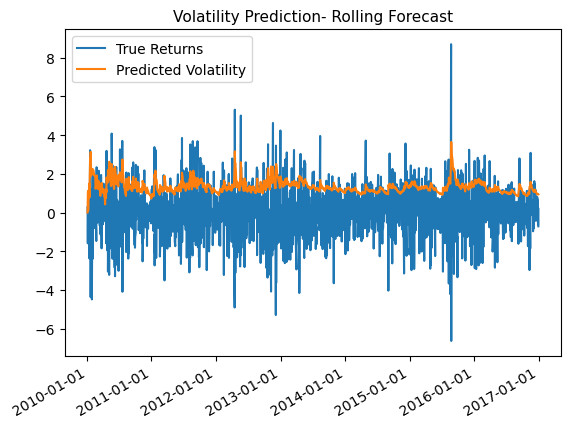

<Figure size 1500x800 with 0 Axes>

In [7]:
dates = pd.to_datetime(data['date'], format='%Y-%m-%d')
true,= plt.plot(dates, data['returns'])
preds,=plt.plot(dates, data['forecasted_volatility'])
plt.title('Volatility Prediction- Rolling Forecast').set_fontsize(11)
plt.legend(['True Returns', 'Predicted Volatility'])
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format date as 'YYYY-MM-DD'
plt.figure(figsize=(15,8))

In [9]:
data.to_csv('data_AAPL_GARCH.csv', encoding='utf-8', index=False)